In [1]:
%matplotlib inline
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mevpy as mev
import os
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.simplefilter('ignore')

In [2]:
path = r"C:\Users\meesw\Documents\TU delft\BEP\Eindwerk"
os.chdir(path)

T = np.asarray([0.5, 1, 1.2, 1.5, 2, 5, 10, 20, 35, 50, 100, 200, 300, 500, 1000])
F = np.exp(-(1/T))*(1/T)**0

def weerstation(N, yarb):
    g1 = []
    g2 = []
    T = []
    T0_5, T1, T1_2, T1_5, T2, T5, T10, T20, T35, T50, T100, T200, T300, T500, T1000 = [], [], [], [], [], [], [], [], [], [], [], [], [], [], []
    Title = []
    
    for file in os.listdir():
        if file.endswith(".txt"):
            file_path = f"{path}\{file}"
            rain = pd.read_csv(file_path, skipinitialspace=True, sep=" ", parse_dates=[0], header=None, skiprows=1, names=['date', 'RD'])
            rain = rain.set_index("date")
            rain['YEAR'] = rain.index.year
            rain = rain[rain.RD != 99999.9]
            y0 = rain['YEAR'].unique()[-(N+1)]
            dataN = rain.loc[str(y0): '2021']
            
            if np.count_nonzero(dataN['RD'].notnull() != False) > 365.25*60*0.95: 
                AMS1, q1, T_a1    = mev.tab_rain_max(dataN[0 : int(len(dataN)/2)])
                T_real1 = -1/(np.log(1-(1/T_a1)))
                csi1, sigma1, mu1 = mev.gev_fit(AMS1)
                g1.append(mev.gev_quant(F, csi1, sigma1, mu1))
    
                AMS2, q2, T_a2    = mev.tab_rain_max(dataN[int(len(dataN)/2) : -1])
                T_real2 = -1/(np.log(1-(1/T_a2)))
                csi2, sigma2, mu2 = mev.gev_fit(AMS2)
                g2.append(mev.gev_quant(F, csi2, sigma2, mu2))
                Title.append(file_path[0][52:-10])
    
    for i in range(len(g1)):
        T.append((g2[i] - g1[i]) / g1[i])
        T0_5.append(T[i][0]), T1.append(T[i][1]), T1_2.append(T[i][2]), T1_5.append(T[i][3]), T2.append(T[i][4]), 
        T5.append(T[i][5]), T10.append(T[i][6]), T20.append(T[i][7]), T35.append(T[i][8]), T50.append(T[i][9]), T100.append(T[i][10]),
        T200.append(T[i][11]), T300.append(T[i][12]), T500.append(T[i][13]), T1000.append(T[i][-1])
    Ts = [T0_5, T1, T1_2, T1_5, T2, T5, T10, T20, T35, T50, T100, T200, T300, T500, T1000]
    
    return Ts, Title

In [3]:
Ts, meetstations = weerstation(60, '2021')
T0_5, T1, T1_2, T1_5, T2, T5, T10, T20, T35, T50, T100, T200, T300, T500, T1000 = np.multiply(Ts, 100)
names = ['1 jaar', '5 jaar', '100 jaar']
clb = ['lightsalmon',  'plum', 'skyblue']
cll = ['red', 'purple', 'blue']
visual = [T1, T5, T100]

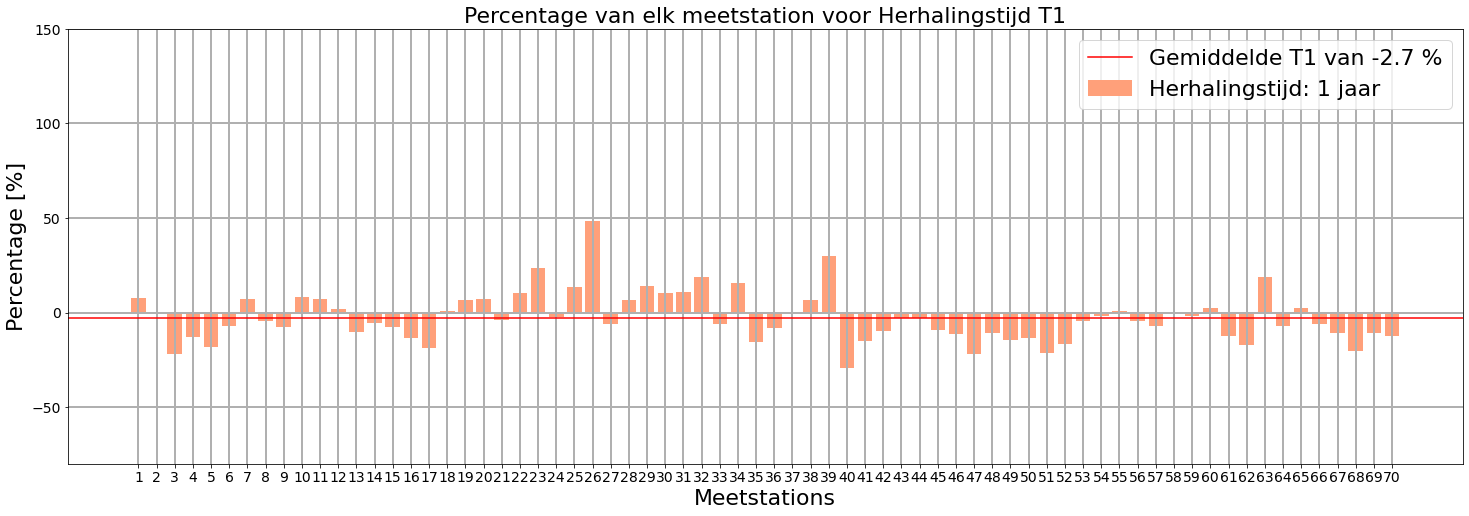

In [4]:
plt.figure(figsize=(25,8))
x = np.linspace(1, len(T1), len(T1))
plt.bar(x, T1, color=clb[0], label='Herhalingstijd: 1 jaar')
plt.axhline(np.mean(T1), color=cll[0], label=f'Gemiddelde T1 van {np.mean(T1):.1f} %')
plt.title("Percentage van elk meetstation voor Herhalingstijd T1", fontsize=22)
plt.xlabel('Meetstations', fontsize=22)
plt.ylabel('Percentage [%]', fontsize=22)
plt.ylim(-80, 150)
plt.xticks(x, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(prop={'size': 22})
plt.grid(True, lw=2)
plt.savefig("Percentage van elk meetstation voor Herhalingstijd T1");

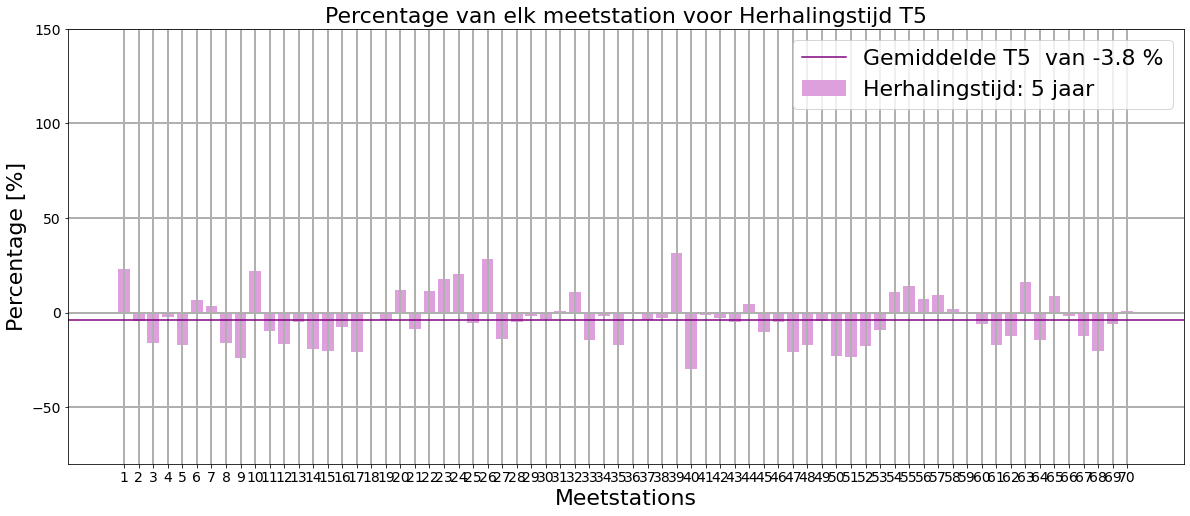

In [5]:
plt.figure(figsize=(20,8))
x = np.linspace(1, len(T1), len(T1))
plt.bar(x, T5, color=clb[1], label='Herhalingstijd: 5 jaar')
plt.axhline(np.mean(T5), color=cll[1], label=f'Gemiddelde T5  van {np.mean(T5):.1f} %')
plt.title("Percentage van elk meetstation voor Herhalingstijd T5", fontsize=22)
plt.xlabel('Meetstations', fontsize=22)
plt.ylabel('Percentage [%]', fontsize=22)
plt.ylim(-80, 150)
plt.xticks(x, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(prop={'size': 22})
plt.grid(True, lw=2)
plt.savefig("Percentage van elk meetstation voor Herhalingstijd T5");

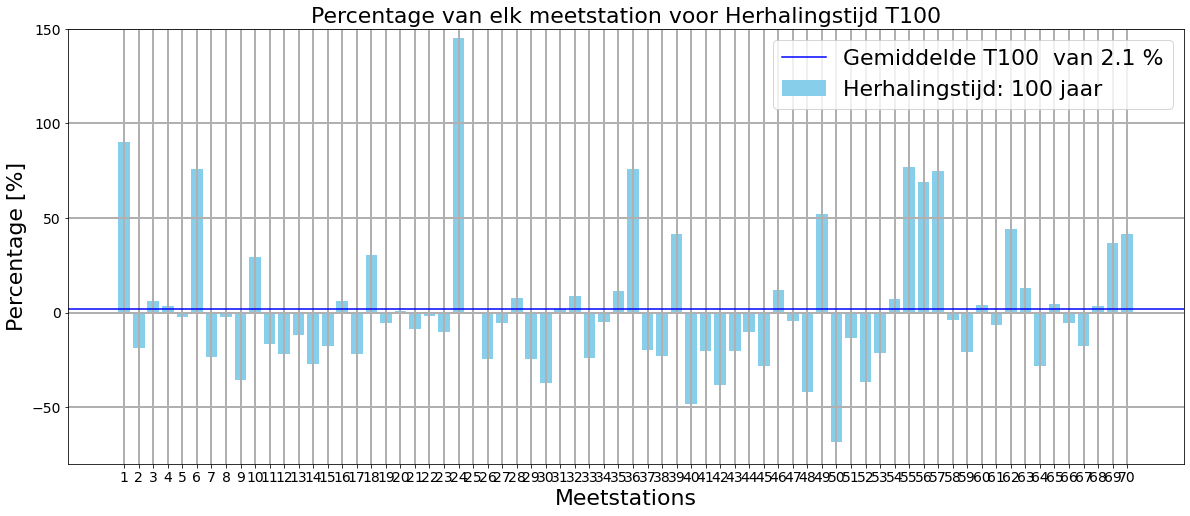

In [6]:
plt.figure(figsize=(20,8))
x = np.linspace(1, len(T1), len(T1))
plt.bar(x, T100, color=clb[2], label='Herhalingstijd: 100 jaar')
plt.axhline(np.mean(T100), color=cll[2], label=f'Gemiddelde T100  van {np.mean(T100):.1f} %')
plt.title("Percentage van elk meetstation voor Herhalingstijd T100", fontsize=22)
plt.xlabel('Meetstations', fontsize=22)
plt.ylabel('Percentage [%]', fontsize=22)
plt.ylim(-80, 150)
plt.xticks(x, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(prop={'size': 22})
plt.grid(True, lw=2)
plt.savefig("Percentage van elk meetstation voor Herhalingstijd T100");

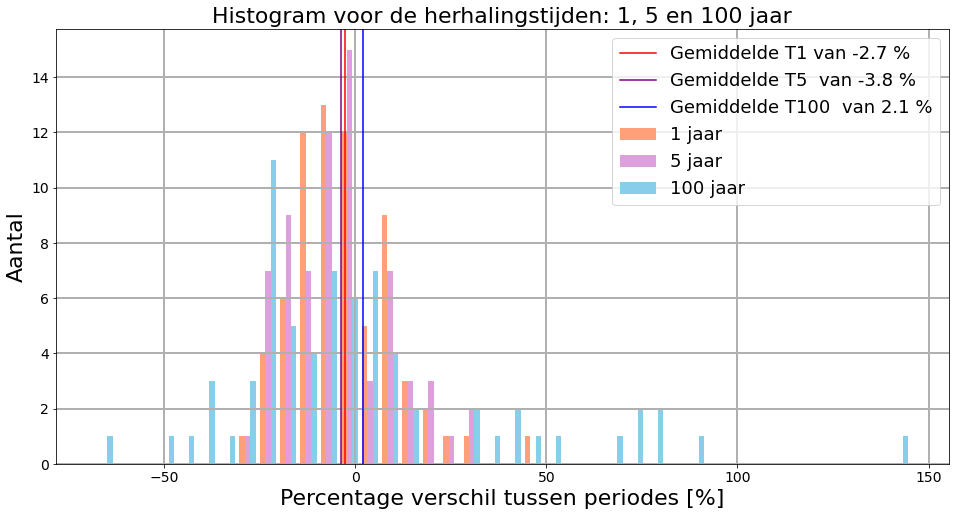

In [7]:
plt.figure(figsize=(16,8))
plt.hist((T1, T5, T100), int(200/5), rwidth=0.8, color=clb, label=names)
plt.axvline(np.mean(T1), color=cll[0], label=f'Gemiddelde T1 van {np.mean(T1):.1f} %')
plt.axvline(np.mean(T5), color=cll[1], label=f'Gemiddelde T5  van {np.mean(T5):.1f} %')
plt.axvline(np.mean(T100), color=cll[2], label=f'Gemiddelde T100  van {np.mean(T100):.1f} %')
plt.xlabel('Percentage verschil tussen periodes [%]', fontsize= 22)
plt.ylabel('Aantal', fontsize= 22)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(prop={'size':18})
plt.title('Histogram voor de herhalingstijden: 1, 5 en 100 jaar', fontsize= 22)
plt.grid(True, lw=2)
plt.savefig("Histogram percentage T1, T5, T100", dpi=300, quality=95)
plt.show();

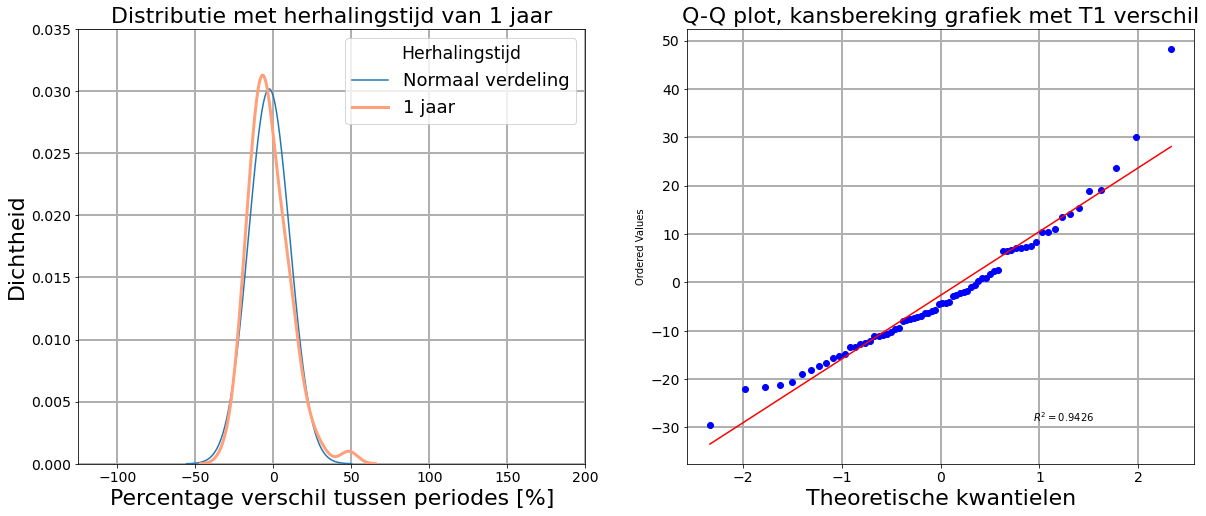

In [8]:
plt.figure(figsize=(20, 8))
mu = np.mean(T1)
sigma = np.std(T1)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)

plt.subplot(1, 2, 1)
plt.plot(x, norm.pdf(x, mu, sigma), label='Normaal verdeling')
sns.distplot(visual[0], hist=False, kde=True, bins=int(200/5), kde_kws = {'linewidth' : 3}, label=names[0], color=clb[0])
plt.title('Distributie met herhalingstijd van 1 jaar', fontsize= 22)
plt.xlim(-125, 200)
plt.ylim(0, 0.035)
plt.xlabel('Percentage verschil tussen periodes [%]', fontsize=22)
plt.ylabel('Dichtheid', fontsize=22)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', prop={'size':18}, title = 'Herhalingstijd', title_fontsize = 'xx-large')
plt.grid(True, lw=2)

plt.subplot(1, 2, 2)
stats.probplot(visual[0], plot= plt, rvalue= True)
plt.xlabel('Theoretische kwantielen', fontsize=22)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Q-Q plot, kansbereking grafiek met T1 verschil", fontsize= 22)
plt.grid(True, lw=2)

plt.savefig("Distributie met herhalingstijd van 1 jaar", dpi=300, quality=95)
plt.show();

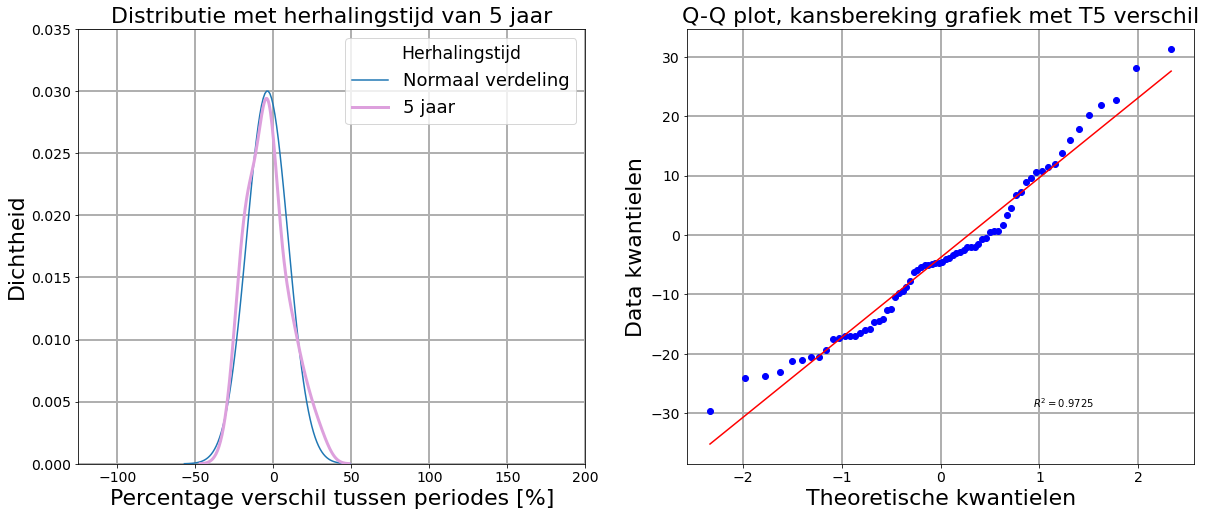

In [9]:
plt.figure(figsize=(20, 8))

mu = np.mean(T5)
sigma = np.std(T5)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)

plt.subplot(1, 2, 1)
plt.plot(x, norm.pdf(x, mu, sigma), label='Normaal verdeling')
sns.distplot(visual[1], hist=False, kde=True, bins=int(200/5), kde_kws = {'linewidth' : 3}, label=names[1], color=clb[1])
plt.title('Distributie met herhalingstijd van 5 jaar', fontsize= 22)
plt.xlim(-125, 200)
plt.ylim(0, 0.035)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Percentage verschil tussen periodes [%]', fontsize=22)
plt.ylabel('Dichtheid', fontsize=22)
plt.legend(loc='best', prop={'size':18}, title = 'Herhalingstijd', title_fontsize = 'xx-large')
plt.grid(True, lw=2)

plt.subplot(1, 2, 2)
stats.probplot(visual[1], plot= plt, rvalue= True)
plt.xlabel('Theoretische kwantielen', fontsize=22)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Data kwantielen', fontsize=22)
plt.title("Q-Q plot, kansbereking grafiek met T5 verschil", fontsize= 22)
plt.grid(True, lw=2)
plt.savefig("Distributie met herhalingstijd van 5 jaar", dpi=300, quality=95)
plt.show();

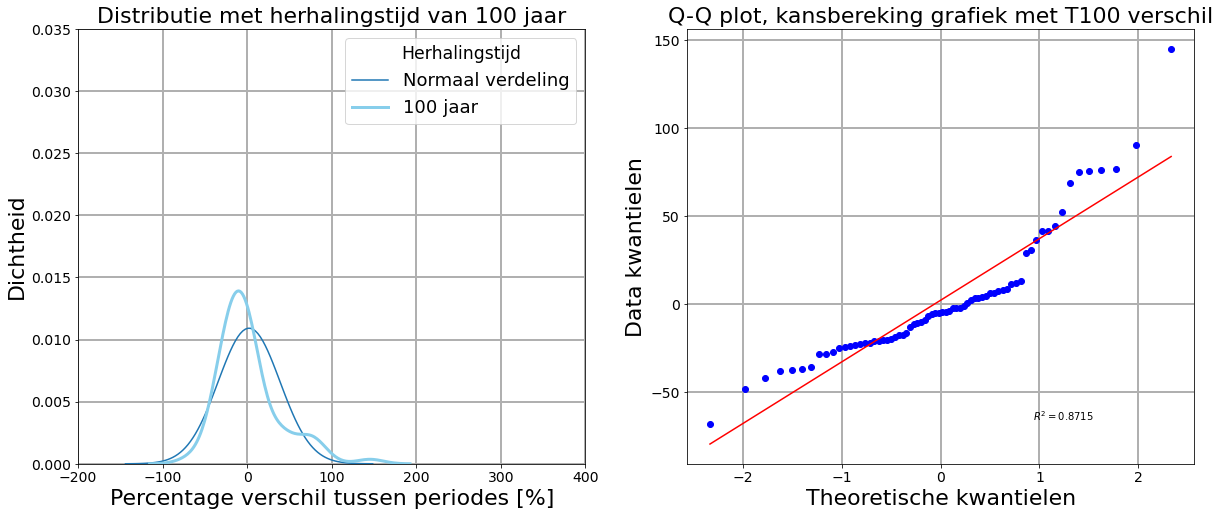

In [10]:
plt.figure(figsize=(20, 8))

mu = np.mean(T100)
sigma = np.std(T100)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)

plt.subplot(1, 2, 1)
plt.plot(x, norm.pdf(x, mu, sigma), label='Normaal verdeling')
sns.distplot(T100, hist=False, kde=True, bins=int(200/5), kde_kws = {'linewidth' : 3}, label='100 jaar', color=clb[2])
plt.title('Distributie met herhalingstijd van 100 jaar', fontsize= 22)
plt.xlim(-200, 400)
plt.ylim(0, 0.035)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Percentage verschil tussen periodes [%]', fontsize=22)
plt.ylabel('Dichtheid', fontsize=22)
plt.legend(loc='best', prop={'size':18}, title = 'Herhalingstijd', title_fontsize = 'xx-large')
plt.grid(True, lw=2)

plt.subplot(1, 2, 2)
stats.probplot(T100, plot= plt, rvalue= True)
plt.xlabel('Theoretische kwantielen', fontsize=22)
plt.ylabel('Data kwantielen', fontsize=22)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Q-Q plot, kansbereking grafiek met T100 verschil", fontsize= 22)
plt.grid(True, lw=2)
plt.savefig("Distributie met herhalingstijd van 100 jaar", dpi=300, quality=95)
plt.show();

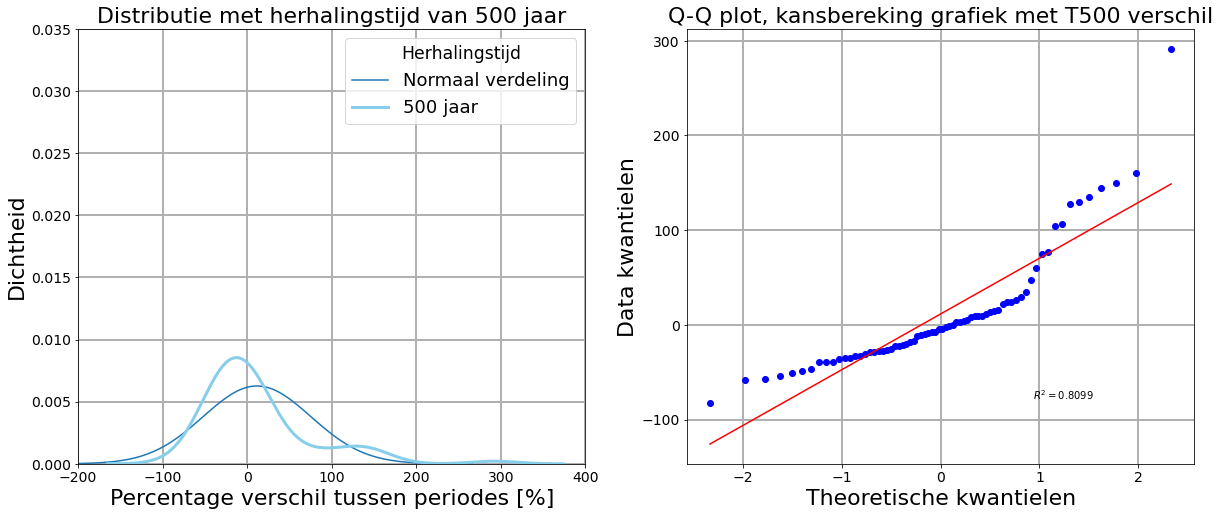

In [11]:
plt.figure(figsize=(20, 8))

mu = np.mean(T500)
sigma = np.std(T500)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)

plt.subplot(1, 2, 1)
plt.plot(x, norm.pdf(x, mu, sigma), label='Normaal verdeling')
sns.distplot(T500, hist=False, kde=True, bins=int(200/5), kde_kws = {'linewidth' : 3}, label='500 jaar', color=clb[2])
plt.title('Distributie met herhalingstijd van 500 jaar', fontsize= 22)
plt.xlim(-200, 400)
plt.ylim(0, 0.035)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Percentage verschil tussen periodes [%]', fontsize=22)
plt.ylabel('Dichtheid', fontsize=22)
plt.legend(loc='best', prop={'size':18}, title = 'Herhalingstijd', title_fontsize = 'xx-large')
plt.grid(True, lw=2)

plt.subplot(1, 2, 2)
stats.probplot(T500, plot= plt, rvalue= True)
plt.xlabel('Theoretische kwantielen', fontsize=22)
plt.ylabel('Data kwantielen', fontsize=22)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Q-Q plot, kansbereking grafiek met T500 verschil", fontsize= 22)
plt.grid(True, lw=2)
plt.savefig("Distributie met herhalingstijd van 500 jaar", dpi=300, quality=95)
plt.show();

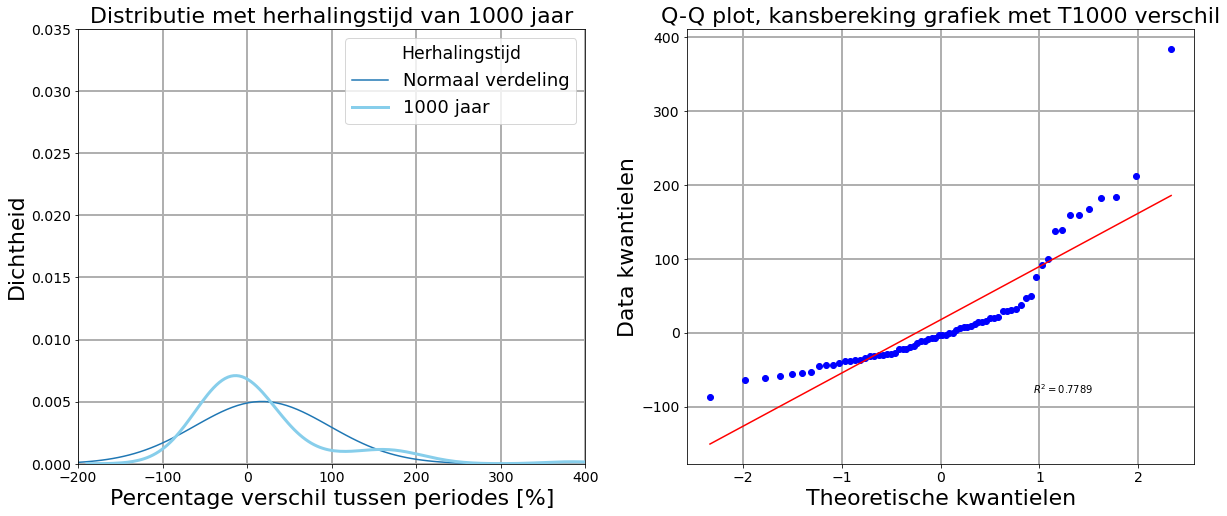

In [12]:
plt.figure(figsize=(20, 8))

mu = np.mean(T1000)
sigma = np.std(T1000)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)

plt.subplot(1, 2, 1)
plt.plot(x, norm.pdf(x, mu, sigma), label='Normaal verdeling')
sns.distplot(T1000, hist=False, kde=True, bins=int(200/5), kde_kws = {'linewidth' : 3}, label='1000 jaar', color=clb[2])
plt.title('Distributie met herhalingstijd van 1000 jaar', fontsize= 22)
plt.xlim(-200, 400)
plt.ylim(0, 0.035)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Percentage verschil tussen periodes [%]', fontsize=22)
plt.ylabel('Dichtheid', fontsize=22)
plt.legend(loc='best', prop={'size':18}, title = 'Herhalingstijd', title_fontsize = 'xx-large')
plt.grid(True, lw=2)

plt.subplot(1, 2, 2)
stats.probplot(T1000, plot= plt, rvalue= True)
plt.xlabel('Theoretische kwantielen', fontsize=22)
plt.ylabel('Data kwantielen', fontsize=22)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Q-Q plot, kansbereking grafiek met T1000 verschil", fontsize= 22)
plt.grid(True, lw=2)
plt.savefig("Distributie met herhalingstijd van 1000 jaar", dpi=300, quality=95)
plt.show();

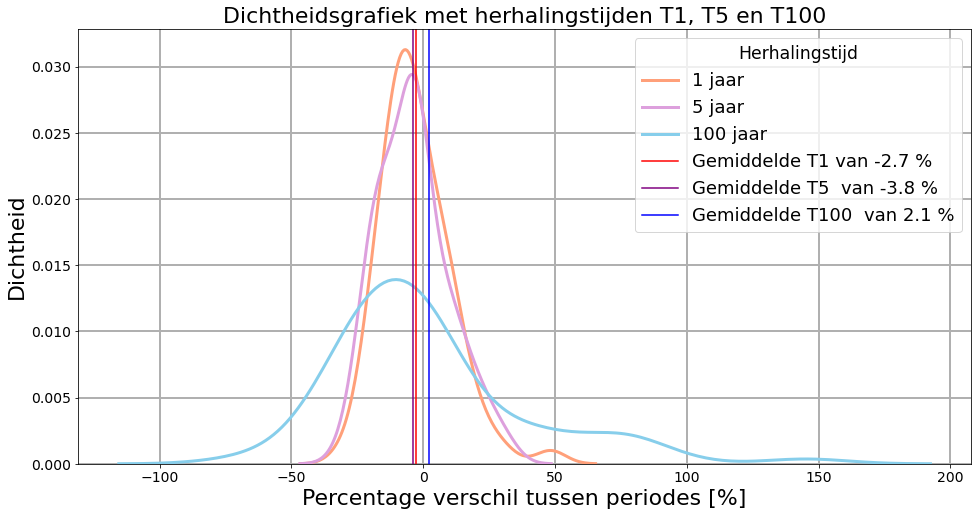

In [13]:
plt.figure(figsize=(16,8))
visual = [T1, T5, T100]
for i in range(len(names)):
    sns.distplot(visual[i], hist=False, kde=True, bins=int(200/5), kde_kws = {'linewidth' : 3}, label=names[i], color=clb[i])

plt.axvline(np.mean(T1), color=cll[0], label=f'Gemiddelde T1 van {np.mean(T1):.1f} %')
plt.axvline(np.mean(T5), color=cll[1], label=f'Gemiddelde T5  van {np.mean(T5):.1f} %')
plt.axvline(np.mean(T100), color=cll[2], label=f'Gemiddelde T100  van {np.mean(T100):.1f} %')
plt.title('Dichtheidsgrafiek met herhalingstijden T1, T5 en T100', fontsize= 22)
plt.xlabel('Percentage verschil tussen periodes [%]', fontsize=22)
plt.ylabel('Dichtheid', fontsize=22)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(prop={'size':18}, title = 'Herhalingstijd', title_fontsize = 'xx-large')
plt.grid(True, lw=2)
plt.savefig('Dichtheidsgrafiek met herhalingstijden T1, T5 en T100', dpi=300, quality=95);

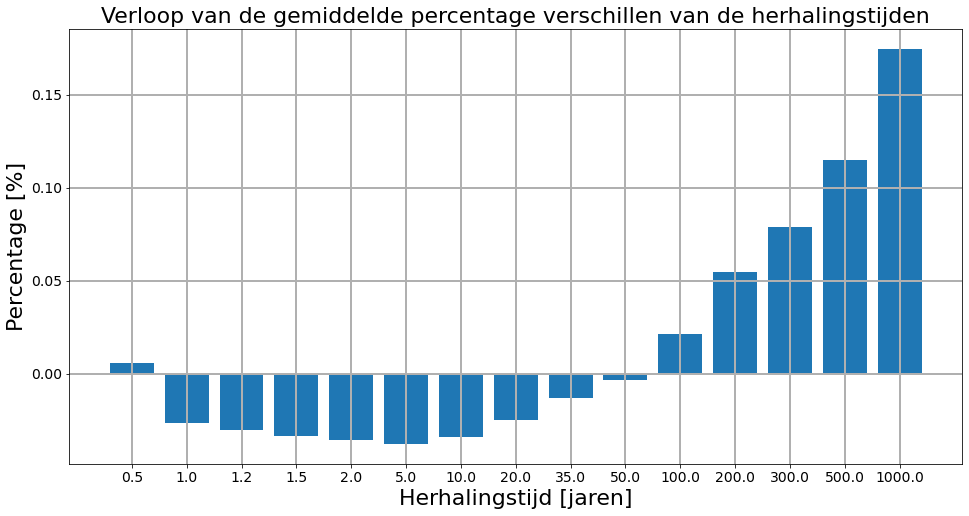

In [14]:
verloopT = []
for i in range(len(Ts)):
    verloopT.append(np.mean(Ts[i]))

plt.figure(figsize=(16,8))
x = np.linspace(0, len(T)-1, len(T))
plt.bar(x, verloopT)
plt.xticks(x, T, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, lw=2)
plt.xlabel('Herhalingstijd [jaren]', fontsize=22)
plt.ylabel('Percentage [%]', fontsize=22)
plt.title('Verloop van de gemiddelde percentage verschillen van de herhalingstijden', fontsize=22)
plt.savefig('Verloop van de Herhalingstijden [jaren]');

In [15]:
data = {'P-waarde (Shapiro-Wilk methode)': (stats.shapiro(T1)[1], stats.shapiro(T5)[1], stats.shapiro(T100)[1], stats.shapiro(T500)[1], stats.shapiro(T1000)[1])}
df = pd.DataFrame(data, index=['T1', 'T5', 'T100', 'T500', 'T1000'])
display(df)
df.to_excel("Shapiro.xlsx", sheet_name='ja')

,P-waarde (Shapiro-Wilk methode)
T1,7.200007e-03
T5,9.053782e-02
T100,6.652158e-06
T500,7.870356e-08
T1000,1.204920e-08
